In [158]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import datetime
import matplotlib.pyplot as plt
import nltk
import scipy.stats
import statsmodels.api as sm

#nltk package downloaded one time.
#nltk.download()


C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Gather Data from local file, URL and API sources

## 1.1. Read csv file and create a new pandas dataframe which carries tabular information 

First, load csv file to a new dataframe

In [2]:
df_csv = pd.read_csv('twitter-archive-enhanced.csv')
df_csv.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 1.2. Download .tsv file from URL address and store in local file

In [246]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'C:/Users/TTMKAR/Desktop/Python/DataWrangling'

In [4]:
response = requests.get(url)
response

<Response [200]>

### 1.2.1. Check the content donwloaded from URL.

In [5]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

#### Check result: Content seems OK. Now, store file in local directory. Then read it from .tsv file and load to another dataframe.

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [7]:

df_tsv = pd.DataFrame
df_tsv = pd.read_csv(os.path.join(folder_name, url.split('/')[-1]), sep='\t')
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 1.3. Use Twitter API to retrieve information about tweets

### 1.3.1. Use Tweepy library to call Twitter API and get extra information about tweets in csv and tsv files.

In [8]:
# API keys are created and filled here.
consumer_key= ''
consumer_secret= ''

access_token= ''
access_token_secret= ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
api.wait_on_rate_limit=True
api.wait_on_rate_limit_notify=True


### 1.3.2. Query each tweet in csv file and store each JSON object response in a separate line in text file

In [10]:

with open(folder_name + '/' + 'tweet_json.txt',mode='w') as file2:
    for tweet_id in df['tweet_id']:
        try:
            tweet_status = api.get_status(id=tweet_id)
            tweet_status_str = json.dumps(tweet_status._json)
            file2.write(tweet_status_str +'\n')
            print(tweet_id)
        except:
            print('could not get: ' + str(tweet_id))
    

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
could not get: 888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
8822681101993697

821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817

764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336


Rate limit reached. Sleeping for: 503


could not get: 758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
7519500173222461

705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345

678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345


Rate limit reached. Sleeping for: 584


could not get: 676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
6757073302065479

668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997

### 1.3.3. Create a list of JSON objects read from the file created above.

In [9]:
tweet_status_list=[]

with open(folder_name + '/' + 'tweet_json.txt',mode='r') as file2:
    for line in file2:
        tweet_status_json = json.loads(line)
        tweet_status_list.append(tweet_status_json)

#Double check about the structure of JSON object. Seems healthy. 
tweet_status_json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'sizes': {'large': {'h': 720, 'resize': 'fit', 'w': 960},
     'medium': {'h': 720, 'resize': 'fit', 'w': 960},
     'small': {'h': 510, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/BLDqew2Ijj'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/p

In [10]:
df_api = pd.DataFrame(tweet_status_list)
df_api.head()


,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38859,False,None,892420643555336193,892420643555336193,...,NaN,NaN,NaN,8610,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,33280,False,None,892177421306343426,892177421306343426,...,NaN,NaN,NaN,6324,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,25076,False,None,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4195,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42239,False,None,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8722,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,40381,False,None,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9489,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# 2. Assess Datasets  

### In this section, the 3 pieces of datasets from local, URL and API sources will be cleaned and assessed for analysis.


## 2.1. Assessment of .csv Dataset

In [11]:
df_csv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_csv.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
df_csv.rating_numerator.isnull().values.any() 

False

In [15]:
df_csv.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

(array([   2.,    9.,    9.,   19.,   17.,   37.,   32.,   55.,  102.,
         158.,  461.,  464.,  558.,  351.,   54.,    2.,    0.,    1.,
           0.,    1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

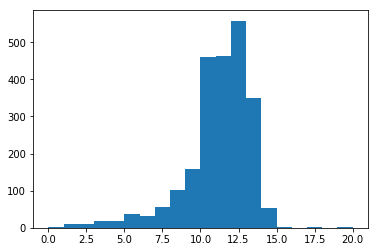

In [16]:
binwidth=1
plt.hist(df_csv.rating_numerator, bins=np.arange(min(df_csv.rating_numerator), 20 + binwidth, binwidth))


In [17]:
df_csv.rating_denominator.isnull().values.any()

False

In [18]:
df_csv.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

(array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.33300000e+03,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25]),
 <a list of 20 Patch objects>)

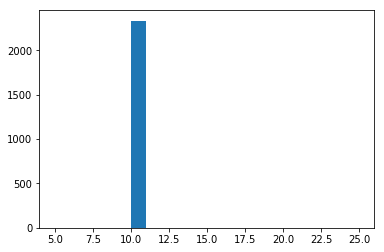

In [19]:
binwidth=1
plt.hist(df_csv.rating_denominator, bins=np.arange(5, 25 + binwidth, binwidth))


In [20]:
df_csv.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [21]:
df_csv.name[df_csv.name.duplicated()]


7         None
12        None
23      Canela
24        None
25        None
30        None
32        None
35        None
37        None
41        None
42        None
47        None
55        None
59        None
60       Bella
62        None
64        None
72        None
75      Shadow
76        Emmy
78        None
83        None
88        None
89        None
93        None
96        None
98      Sierra
99        None
100       None
101       None
         ...  
2326     quite
2327         a
2328      None
2329      None
2330      None
2331      None
2332      None
2333        an
2334         a
2335        an
2336      None
2337      None
2338      None
2339      None
2340      None
2341      None
2342      None
2343      None
2344      None
2345       the
2346       the
2347         a
2348         a
2349        an
2350         a
2351      None
2352         a
2353         a
2354         a
2355      None
Name: name, Length: 1399, dtype: object

### Assessment Results for .csv Dataset

#### Quality Issues

1. Need to remove tweets beyond 1 Aug 2017 since dog breed information can not be retrieved for them.
2. Remove reply and retweets 
3. Try to find out missing dog names 
4. There are Rating denominators different than 10. They must be set to 10.
5. Rating numerators start from 0 to 1776. Need to fix them.


#### Tidiness Issues

1. A new rating columns is to be created instead of rating numerator and denominator columns. Also, need to nırmalise the rating data for all dogs.

2. Columns names doggo, floofer, pupper and puppo are indeed variables for Dog stage. Need to create a new column of Dog stage and assign column value with stage of each dog for comparison. 



## 2.2. Assessment of .tsv Dataset

In [22]:
df_tsv

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_tsv.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [25]:
df_tsv.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_tsv.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [27]:
#Check if any dog breed names are written low and uppercase differently. 

df_tsv['p1_lowcase']=df_tsv['p1'].str.lower()
df_tsv.p1_lowcase.nunique() - df_tsv.p1.nunique()


0

In [28]:
df_tsv.jpg_url.value_counts()

https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                       

### Assessment Results for .tsv Dataset

#### Quality Issues

1. Some dog breed names are not for dogs such as guinea_pig or tiger_shark: Reliability of prediction algorithm.
2. The reliability of the predictions in tsv file may be low since minimum for p1_conf is 0.044 and 25% percentile is 0.36. 

#### Tidiness Issues

1. There are 3 predictions in 3 separate columns. A new column needed for carrying the breed information so that analysis could be made easier. 


## 2.3. Assessment of API Dataset


In [29]:
df_api

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38859,False,None,892420643555336193,892420643555336193,...,NaN,NaN,NaN,8610,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,33280,False,None,892177421306343426,892177421306343426,...,NaN,NaN,NaN,6324,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,25076,False,None,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4195,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42239,False,None,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8722,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,40381,False,None,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9489,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,20248,False,None,891087950875897856,891087950875897856,...,NaN,NaN,NaN,3139,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,11869,False,None,890971913173991426,890971913173991426,...,NaN,NaN,NaN,2093,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,65654,False,None,890729181411237888,890729181411237888,...,NaN,NaN,NaN,19084,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,27810,False,None,890609185150312448,890609185150312448,...,NaN,NaN,NaN,4309,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,31997,False,None,890240255349198849,890240255349198849,...,NaN,NaN,NaN,7489,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [30]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2343 non-null object
entities                         2343 non-null object
extended_entities                1822 non-null object
favorite_count                   2343 non-null int64
favorited                        2343 non-null bool
geo                              0 non-null object
id                               2343 non-null int64
id_str                           2343 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2343 non-null bool
lang                             2343 non-null objec

### Assessment Results for API Dataset

#### Quality Issues 

1. API returned response for 2343 tweets of total 2356 tweets in csv dataset.
2. Retweet count and favorite count are not available for some tweets returned by API. Tweets with NaN values will be removed below.
3. There are reply and retweets also. They need to e removed.

### 2.3.4. Check column names for duplicates 

In [35]:
all_columns = pd.Series(list(df_csv) + list(df_tsv) + list(df_api))
all_columns[all_columns.duplicated()]

17                 tweet_id
41    in_reply_to_status_id
43      in_reply_to_user_id
56                   source
57                     text
dtype: object

### Tidiness Assessment Results for Column Names

1. In csv and tsv file, tweet_id columns are duplicates. Also, in API response file, id is indeed tweet_id. These 3 columns will be used for merging 3 datasets.
2. "in_reply_to_status_id" and "in_reply_to_user_id" columns are also duplicates. 

# 3. Clean Datasets and Get Ready for Analysis


## 3.1. Clean csv dataset 



In [36]:
#Copy the original dataframe to keep it unchanged.

df_csv_clean = df_csv.copy()


C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


### 3.1.1. Fix quality issue: Remove tweets beyond 1 Aug 2017

In [ ]:
datelimit = datetime.date(2017,8,1)
df_csv_clean['datetime'] = pd.to_datetime(df_csv_clean['timestamp'])
df_csv_clean = df_csv_clean[df_csv_clean['datetime'] < datelimit]


### 3.1.2. Fix quality issue: Remove retweets and replies

In [ ]:
df_csv_clean = df_csv_clean[pd.isnull(df_csv_clean['in_reply_to_status_id'])]

df_csv_clean = df_csv_clean[pd.isnull(df_csv_clean['retweeted_status_id'])]

### 3.1.3. Fix quality issue: Unknown dog names

In [ ]:
# 3. Now only make some visually found misinterpreted names as Unknown or None. 
for index, row in df_csv_clean.iterrows():
    if row['name'] in ('a', 'an', 'the', 'quite', 'infuriating', 'not', 'O', 'my', 'all', 'old', 'this', 'by'):
        df_csv_clean.set_value(index, 'name', 'None') 


### 3.1.4 Fix tidiness issue: Create a new column for dog stage and collect all the data under this new columns. 

In [37]:
# 4.Create a new columns for dog stages and fill by search again in texts 

df_csv_clean['stage'] = 'None'

for index, row in df_csv_clean.iterrows():
    if 'doggo' in row['text']:
        df_csv_clean.set_value(index,'stage', 'doggo')
        print('doggo')
    elif 'puppo' in row['text']:
        df_csv_clean.set_value(index,'stage', 'puppo')
        print('puppo')
    elif 'pupper' in row['text']:
        df_csv_clean.set_value(index,'stage', 'pupper')
        print('pupper')
    elif 'floof' in row['text']:
        df_csv_clean.set_value(index,'stage', 'floofer')
        print('floofer')
    elif 'snoot' in row['text']:
        df_csv_clean.set_value(index,'stage', 'snoot')
        print('snoot')
    elif 'blep' in row['text']:
        df_csv_clean.set_value(index,'stage', 'blep')
        print('blep')

df_csv_clean.stage.value_counts() 


doggo
puppo
puppo
floofer
pupper
doggo
floofer
pupper
floofer
pupper
pupper
blep
pupper
doggo
puppo
pupper
puppo
pupper
doggo
puppo
pupper
doggo
doggo
doggo
puppo
puppo
pupper
puppo
doggo
doggo
pupper
doggo
pupper
doggo
doggo
pupper
doggo
pupper
puppo
pupper
doggo
pupper
doggo
pupper
doggo
doggo
doggo
doggo
doggo
pupper
doggo
doggo
doggo
pupper
doggo
doggo
doggo
doggo
puppo
puppo
pupper
puppo
pupper
doggo
doggo
doggo
floofer
puppo
doggo
pupper
doggo
doggo
pupper
pupper
doggo
doggo
doggo
doggo
pupper
pupper
doggo
pupper
puppo
puppo
puppo
doggo
pupper
floofer
doggo
doggo
pupper
doggo
floofer
doggo
floofer
pupper
puppo
puppo
pupper
puppo
doggo
doggo
puppo
doggo
doggo
doggo
puppo
floofer
doggo
pupper
pupper
pupper
floofer
pupper
doggo
doggo
pupper
floofer
pupper
doggo
pupper
doggo
doggo
pupper
doggo
doggo
pupper
doggo
doggo
doggo
pupper
doggo
puppo
pupper
doggo
doggo
doggo
doggo
puppo
doggo
pupper
doggo
pupper
floofer
puppo
pupper
pupper
pupper
pupper
doggo
pupper
doggo
doggo
doggo
pupper


C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\TTM

None       1722
pupper      238
doggo        84
puppo        27
floofer      23
blep          1
Name: stage, dtype: int64

### 3.1.5. Fix quality and tidiness issue: rating numerator & denominators to be normalised and then create a new rating column to collect the data together for comparison.

In [120]:

# 5.There are 18 different rating denominator values. Make them all 10. But no need to use this column as I used max value to normalize. 
df_csv_clean['rating_denominator'] = 10

# 6.Rating numerator values start from 0 to 1776. Clip values higher than 20 to 20. 
df_csv_clean['rating_numerator'].clip(lower=0, upper=20, inplace=True)

#Create a new column for rating and normalize with max value. No need for separate numerator and denominator. Now ready for analysis. Solved the tidiness issue.
df_csv_clean['rating'] = df_csv_clean['rating_numerator'] / df_csv_clean['rating_numerator'].max()

df_csv_clean['rating'].describe()


count    2095.000000
mean        0.533723
std         0.116356
min         0.000000
25%         0.500000
50%         0.550000
75%         0.600000
max         1.000000
Name: rating, dtype: float64

In [121]:
#7. Drop columns which will not be used for analysis
df_csv_final = df_csv_clean[['tweet_id','name','rating','stage','text']].copy()

df_csv_final

,tweet_id,name,rating,stage,text
2,891815181378084864,Archie,0.60,None,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Darla,0.65,None,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Franklin,0.60,None,This is Franklin. He would like you to stop ca...
5,891087950875897856,None,0.65,None,Here we have a majestic great white breaching ...
6,890971913173991426,Jax,0.65,None,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,None,0.65,None,When you watch your owner call another dog a g...
8,890609185150312448,Zoey,0.65,None,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,Cassie,0.70,doggo,This is Cassie. She is a college pup. Studying...
10,890006608113172480,Koda,0.65,None,This is Koda. He is a South Australian decksha...
11,889880896479866881,Bruno,0.65,None,This is Bruno. He is a service shark. Only get...


## 3.2. Clean API Dataset

#### First of all, copy only selected columns planned to use for final analysis

In [230]:
df_api_clean = df_api[['id','retweet_count','favorite_count','text']].copy()

#Rename columns again to fit the other datasets
df_api_clean.columns = ['tweet_id','retweet_count','favorite_count','text_api']

#clean the empty tweet_id & id: They should match
df_api_clean.head()

,tweet_id,retweet_count,favorite_count,text_api
0,892420643555336193,8610,38859,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6324,33280,This is Tilly. She's just checking pup on you....
2,891815181378084864,4195,25076,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8722,42239,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9489,40381,This is Franklin. He would like you to stop ca...


In [231]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 4 columns):
tweet_id          2343 non-null int64
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
text_api          2343 non-null object
dtypes: int64(3), object(1)
memory usage: 73.3+ KB


In [232]:
df_merged = df_csv_final.merge(df_api_clean, how='left')

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 8 columns):
tweet_id          2095 non-null int64
name              2095 non-null object
rating            2095 non-null float64
stage             2095 non-null object
text              2095 non-null object
retweet_count     2093 non-null float64
favorite_count    2093 non-null float64
text_api          2093 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 147.3+ KB


### 3.2.1. Fix quality issue: Remove rows where favorite and retweet count are NaN

In [233]:
df_merged[df_merged.isnull().any(axis=1)].head()


,tweet_id,name,rating,stage,text,retweet_count,favorite_count,text_api
696,758740312047005698,Boston,0.6,None,Meet Boston. He's worried because his tongue w...,NaN,NaN,NaN
1560,676957860086095872,None,0.5,None,10/10 I'd follow this dog into battle no quest...,NaN,NaN,NaN


In [234]:
df_merged.drop([696,1560],axis=0,inplace = True)
df_merged[df_merged.isnull().any(axis=1)].head()

,tweet_id,name,rating,stage,text,retweet_count,favorite_count,text_api


In [235]:
df_merged

,tweet_id,name,rating,stage,text,retweet_count,favorite_count,text_api
0,891815181378084864,Archie,0.60,None,This is Archie. He is a rare Norwegian Pouncin...,4195.0,25076.0,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,Darla,0.65,None,This is Darla. She commenced a snooze mid meal...,8722.0,42239.0,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,Franklin,0.60,None,This is Franklin. He would like you to stop ca...,9489.0,40381.0,This is Franklin. He would like you to stop ca...
3,891087950875897856,None,0.65,None,Here we have a majestic great white breaching ...,3139.0,20248.0,Here we have a majestic great white breaching ...
4,890971913173991426,Jax,0.65,None,Meet Jax. He enjoys ice cream so much he gets ...,2093.0,11869.0,Meet Jax. He enjoys ice cream so much he gets ...
5,890729181411237888,None,0.65,None,When you watch your owner call another dog a g...,19084.0,65654.0,When you watch your owner call another dog a g...
6,890609185150312448,Zoey,0.65,None,This is Zoey. She doesn't want to be one of th...,4309.0,27810.0,This is Zoey. She doesn't want to be one of th...
7,890240255349198849,Cassie,0.70,doggo,This is Cassie. She is a college pup. Studying...,7489.0,31997.0,This is Cassie. She is a college pup. Studying...
8,890006608113172480,Koda,0.65,None,This is Koda. He is a South Australian decksha...,7409.0,30695.0,This is Koda. He is a South Australian decksha...
9,889880896479866881,Bruno,0.65,None,This is Bruno. He is a service shark. Only get...,5016.0,27835.0,This is Bruno. He is a service shark. Only get...


### 3.2.2. Fix quality issue: Attempt to find unknown dog stage names one more time, this time in tweet texts in API data. 

In [191]:
for index, row in df_merged.iterrows():
    if ('doggo' in str(row['text_api'])) or ('doggo' in str(row['text'])):
        df_merged.set_value(index,'stage','doggo')
        print('doggo')
    elif ('puppo' in str(row['text_api'])) or ('puppo' in str(row['text'])):
        df_merged.set_value(index,'stage','puppo')
        print('puppo')
    elif ('pupper' in str(row['text_api'])) or ('pupper' in str(row['text'])):
        df_merged.set_value(index,'stage', 'pupper')
        print('pupper')
    elif ('floof' in str(row['text_api'])) or ('floof' in str(row['text'])):
        df_merged.set_value(index,'stage', 'floof')
        print('floof')
    elif ('snoot' in str(row['text_api'])) or ('snoot' in str(row['text'])):
        df_merged.set_value(index,'stage', 'snoot')
        print('snoot')
    elif ('blep' in str(row['text_api'])) or ('blep' in str(row['text'])):
        df_merged.set_value(index,'stage', 'bleep')
        print('blep')

df_merged.stage.value_counts()

C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '

doggo
puppo
puppo
floof
pupper
doggo
floof
pupper
floof
pupper
pupper
blep
pupper
doggo
puppo
pupper
puppo
pupper
doggo
puppo
pupper
doggo
doggo
doggo
puppo
puppo
pupper
puppo
doggo
doggo
pupper
doggo
pupper
doggo
doggo
pupper
doggo
pupper
puppo
pupper
doggo
pupper
doggo
pupper
doggo
doggo
doggo
doggo
doggo
pupper
doggo
doggo
doggo
pupper
doggo
doggo
doggo
doggo
puppo
puppo
pupper
puppo
pupper
doggo
doggo
doggo
floof
puppo
doggo
pupper
doggo
doggo
pupper
pupper
doggo
doggo
doggo
doggo
pupper
pupper
doggo
pupper
puppo
puppo
puppo
doggo
pupper
floof
doggo
doggo
pupper
doggo
floof
doggo
floof
pupper
puppo
puppo
pupper
puppo
doggo
doggo
puppo
doggo
doggo
doggo
puppo
floof
doggo
pupper
pupper
pupper
floof
pupper
doggo
doggo
pupper
floof
pupper
doggo
pupper
doggo
doggo
pupper
doggo
doggo
pupper
doggo
doggo
doggo
pupper
doggo
puppo
pupper
doggo
doggo
doggo
doggo
puppo
doggo
pupper
doggo
pupper
floof
puppo
pupper
pupper
pupper
pupper
doggo
pupper
doggo
doggo
doggo
pupper
pupper
floof
floof
pup

None      1720
pupper     238
doggo       84
puppo       27
floof       23
bleep        1
Name: stage, dtype: int64

## 3.3. Clean tsv Dataset

1. 


1. Retweets and reply tweets will be removed after left join merging with csv dataframe aytomatically. 
2. Unique number of URL addresses of jps files are less than number of unique tweet_id's. Some URL's may be used more than one?
2. Some dog breed names are not for dogs such as guinea_pig or tiger_shark: Reliability of prediction algorithm.
3. The reliability of the predictions in tsv file may be low since minimum for p1_conf is 0.044 and 25% percentile is 0.36. 


In [192]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
p1_lowcase    2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [193]:
df_tsv

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p1_lowcase
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,box_turtle
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,shopping_cart
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle


### 3.3.1. Fix the tidiness issue: Create a new column for dog breed and gather useful data separeted in 3 columns in this new column.

In [194]:
#Create a new dataframe for cleaning work and keep original data safe. 
df_tsv_clean = df_tsv.copy()


#Create 2 new columns for resultant breed and confidence value. Fill the missing p1 breed names with p2 and p3. Take into account only if pX_dog = True
df_tsv_clean['breed'] ='Unknown'

for index, row in df_tsv_clean.iterrows():
    if row['p1_dog'] == True:
        df_tsv_clean.set_value(index,'breed', row['p1'])
        df_tsv_clean.set_value(index,'p_conf', row['p1_conf'])
    elif row['p2_dog'] == True:
        df_tsv_clean.set_value(index,'breed', row['p2'])
        df_tsv_clean.set_value(index,'p_conf', row['p2_conf'])
    elif row['p3_dog'] == True:
        df_tsv_clean.set_value(index,'breed', row['p3'])
        df_tsv_clean.set_value(index,'p_conf', row['p3_conf'])

#Check how many breeds are Unknown still 
df_tsv_clean.query('breed == "Unknown"')['breed'].count()

C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] ac

324

In [195]:

#drop unused fields
df_tsv_clean = df_tsv_clean.copy()
df_tsv_clean = df_tsv_clean[['tweet_id','breed','p_conf']].copy()
df_tsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id    2075 non-null int64
breed       2075 non-null object
p_conf      1751 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.7+ KB


### 3.3.2. There are retweet and reply tweets also in tsv dataset. They will be cleared after left join to the cleaned data set.


In [196]:
# Merge with df_merged. left join operation will copy only original tweets.

df_final = df_merged.merge(df_tsv_clean, how='left')

df_final

,tweet_id,name,rating,stage,text,retweet_count,favorite_count,text_api,breed,p_conf
0,891815181378084864,Archie,0.60,None,This is Archie. He is a rare Norwegian Pouncin...,4195.0,25076.0,This is Archie. He is a rare Norwegian Pouncin...,Chihuahua,0.716012
1,891689557279858688,Darla,0.65,None,This is Darla. She commenced a snooze mid meal...,8722.0,42239.0,This is Darla. She commenced a snooze mid meal...,Labrador_retriever,0.168086
2,891327558926688256,Franklin,0.60,None,This is Franklin. He would like you to stop ca...,9489.0,40381.0,This is Franklin. He would like you to stop ca...,basset,0.555712
3,891087950875897856,None,0.65,None,Here we have a majestic great white breaching ...,3139.0,20248.0,Here we have a majestic great white breaching ...,Chesapeake_Bay_retriever,0.425595
4,890971913173991426,Jax,0.65,None,Meet Jax. He enjoys ice cream so much he gets ...,2093.0,11869.0,Meet Jax. He enjoys ice cream so much he gets ...,Appenzeller,0.341703
5,890729181411237888,None,0.65,None,When you watch your owner call another dog a g...,19084.0,65654.0,When you watch your owner call another dog a g...,Pomeranian,0.566142
6,890609185150312448,Zoey,0.65,None,This is Zoey. She doesn't want to be one of th...,4309.0,27810.0,This is Zoey. She doesn't want to be one of th...,Irish_terrier,0.487574
7,890240255349198849,Cassie,0.70,doggo,This is Cassie. She is a college pup. Studying...,7489.0,31997.0,This is Cassie. She is a college pup. Studying...,Pembroke,0.511319
8,890006608113172480,Koda,0.65,None,This is Koda. He is a South Australian decksha...,7409.0,30695.0,This is Koda. He is a South Australian decksha...,Samoyed,0.957979
9,889880896479866881,Bruno,0.65,None,This is Bruno. He is a service shark. Only get...,5016.0,27835.0,This is Bruno. He is a service shark. Only get...,French_bulldog,0.377417


### 3.3.3. Fix quality issue: Try to detect the unknown dog names from tweet texts.

After careful search in the internet for extracting names from texts, I decided to use NLTK library for this purpose. The external algorithm developed by Stanford university seems to provide reliable results.

In [197]:
df_final.name.value_counts()

None         683
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Toby           7
Daisy          7
Oscar          6
Bo             6
Stanley        6
Bella          6
Jax            6
Koda           6
Bailey         6
Milo           5
Rusty          5
Buddy          5
Dave           5
Leo            5
Scout          5
Louis          5
Bentley        5
Chester        5
Dexter         4
Alfie          4
            ... 
Beckham        1
Coleman        1
Howie          1
Newt           1
Zara           1
Pipsy          1
Reagan         1
Willy          1
Cupid          1
Strider        1
Alexander      1
Filup          1
Rupert         1
Ace            1
Jaspers        1
Blue           1
Mookie         1
Pepper         1
Theo           1
Gustaf         1
Liam           1
Bertson        1
Shawwn         1
Heinrich       1
Sojourner      1
Brian          1
Shnuggles      1
Bauer         

In [237]:
# Function definition which use nltk library - copied from stackoverflow resources and modified.

def retrieve_name(text):
    return_str = ''
    found=False
    sentences = nltk.sent_tokenize(text)
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
    chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)

    for sentence in chunked_sentences:
        for token in sentence:
            if hasattr(token,'label'):
                if token.label() in ['NE', 'NNP']:
                    found=True
                    return_str= ' '.join(c[0] for c in token.leaves())
    
    if found == False:
        return_str = 'Unknown'
    return(return_str)
                   

In [199]:
df_final['names_extracted'] = df_final['name']

for index, row in df_final.iterrows():
    df_final.set_value(index,'names_extracted', retrieve_name(str(row['text'])))
    

C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [200]:
df_final

,tweet_id,name,rating,stage,text,retweet_count,favorite_count,text_api,breed,p_conf,names_extracted
0,891815181378084864,Archie,0.60,None,This is Archie. He is a rare Norwegian Pouncin...,4195.0,25076.0,This is Archie. He is a rare Norwegian Pouncin...,Chihuahua,0.716012,Norwegian Pouncing Corgo
1,891689557279858688,Darla,0.65,None,This is Darla. She commenced a snooze mid meal...,8722.0,42239.0,This is Darla. She commenced a snooze mid meal...,Labrador_retriever,0.168086,Darla
2,891327558926688256,Franklin,0.60,None,This is Franklin. He would like you to stop ca...,9489.0,40381.0,This is Franklin. He would like you to stop ca...,basset,0.555712,BarkWeek
3,891087950875897856,None,0.65,None,Here we have a majestic great white breaching ...,3139.0,20248.0,Here we have a majestic great white breaching ...,Chesapeake_Bay_retriever,0.425595,BarkWeek
4,890971913173991426,Jax,0.65,None,Meet Jax. He enjoys ice cream so much he gets ...,2093.0,11869.0,Meet Jax. He enjoys ice cream so much he gets ...,Appenzeller,0.341703,Meet Jax
5,890729181411237888,None,0.65,None,When you watch your owner call another dog a g...,19084.0,65654.0,When you watch your owner call another dog a g...,Pomeranian,0.566142,Unknown
6,890609185150312448,Zoey,0.65,None,This is Zoey. She doesn't want to be one of th...,4309.0,27810.0,This is Zoey. She doesn't want to be one of th...,Irish_terrier,0.487574,BarkWeek
7,890240255349198849,Cassie,0.70,doggo,This is Cassie. She is a college pup. Studying...,7489.0,31997.0,This is Cassie. She is a college pup. Studying...,Pembroke,0.511319,Cassie
8,890006608113172480,Koda,0.65,None,This is Koda. He is a South Australian decksha...,7409.0,30695.0,This is Koda. He is a South Australian decksha...,Samoyed,0.957979,BarkWeek
9,889880896479866881,Bruno,0.65,None,This is Bruno. He is a service shark. Only get...,5016.0,27835.0,This is Bruno. He is a service shark. Only get...,French_bulldog,0.377417,Bruno


In [201]:
for index, row in df_final.iterrows():
    if row['names_extracted'] in ['Thank','Please','Great','Has','Looks','Good','Much','BEHIND','Pls','Seems', 'ALWAYS', 'unacceptable', 'incredibly','actually','getting', 'one',' space','such','just','life','mad', 'YOU']:
        df_final.set_value(index,'names_extracted', 'Unknown')

C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
found=0

for index, row in df_final.iterrows():
    if row['name'] == 'None' and row['names_extracted'] != 'Unknown':
        df_final.set_value(index, 'name', row['names_extracted'])
        found +=1
            
found       


C:\Users\TTMKAR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


282

#### 282 more names are found. However, the visual inspection say that there is some reliability problem.

In [203]:
df_final.name.value_counts()

None          402
Cooper         11
Lucy           11
Charlie        11
Oliver         10
Penny           9
Tucker          9
Happy           8
Sadie           8
Winston         8
Lola            8
Daisy           7
Toby            7
Jax             6
Stanley         6
Bailey          6
Oscar           6
Koda            6
Bo              6
Bella           6
Buddy           5
Rusty           5
Scout           5
Zoey            5
Bentley         5
Milo            5
Louis           5
Atlas           5
Dave            5
Leo             5
             ... 
Sweets          1
Malikai         1
Mookie          1
Lil             1
River           1
Theo            1
Gustaf          1
BeBe            1
Liam            1
Bertson         1
Shawwn          1
Heinrich        1
Gòrdón          1
Sojourner       1
Brian           1
Shnuggles       1
Bauer           1
Livvie          1
Duddles         1
Willy           1
Mojo            1
Carly           1
Pipsy           1
Zara            1
Poor      

Result: Number of unknown names are 282 reduced. Extracted names seem not reliable all the time. Need visual test always.

### Finally, save the cleaned file in the csv file. 

In [243]:
df_final.drop(['text_api','names_extracted'],axis=1,inplace = True)  

In [244]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 9 columns):
tweet_id          2093 non-null int64
name              2093 non-null object
rating            2093 non-null float64
stage             2093 non-null object
text              2093 non-null object
retweet_count     2093 non-null float64
favorite_count    2093 non-null float64
breed             1967 non-null object
p_conf            1663 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 243.5+ KB


In [248]:
df_final.to_csv(folder_name + '/' + 'twitter_archive_master.csv')

Check if the file is created correctly by reading it to another test dataframe

In [250]:
df_test = pd.read_csv('twitter_archive_master.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 10 columns):
Unnamed: 0        2093 non-null int64
tweet_id          2093 non-null int64
name              2093 non-null object
rating            2093 non-null float64
stage             2093 non-null object
text              2093 non-null object
retweet_count     2093 non-null float64
favorite_count    2093 non-null float64
breed             1967 non-null object
p_conf            1663 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 163.6+ KB


# 4. Analysis of Cleaned Data

## 4.1. Analysis: Difference in rating statistics of dog stages  

In [205]:
df_final.query('stage not in ["bleep", "None"]').groupby('stage')['rating'].mean()

stage
doggo     0.588690
floof     0.608696
pupper    0.543487
puppo     0.603704
Name: rating, dtype: float64

### As a consequence, people find dogs in puppo and floof stages more charming. Dogs in pupper stage seem less attractive. Dogs in floof and puppo stages have more chance in rating.  

## 4.2. Analysis: Difference in rating statistics of dog breeds

In [206]:
df_final.query('breed != "Unknown"').groupby('breed')['rating'].mean().sort_values(ascending = False).head(25)

breed
clumber                       1.000000
Bouvier_des_Flandres          0.650000
Saluki                        0.625000
briard                        0.616667
Tibetan_mastiff               0.612500
Border_terrier                0.607143
silky_terrier                 0.600000
standard_schnauzer            0.600000
Great_Pyrenees                0.600000
Siberian_husky                0.587500
Gordon_setter                 0.587500
Irish_setter                  0.587500
Samoyed                       0.584524
golden_retriever              0.582372
chow                          0.579167
Australian_terrier            0.575000
wire-haired_fox_terrier       0.575000
Labrador_retriever            0.573333
Pembroke                      0.571277
Eskimo_dog                    0.570455
Irish_water_spaniel           0.566667
Greater_Swiss_Mountain_dog    0.566667
Leonberg                      0.566667
Doberman                      0.566667
Norfolk_terrier               0.566667
Name: rating, dtype

### Some dog breeds seem to get higher mean rating values. Clumber, Bouvier_des_Flandres, Saluki, Briard and Tibetan mastiff are top five dog breeds. As an insight, it can be said that dogs of these breeds will get higher chance in the rating. 

## 4.3. Analysis: Linear Relationship between rating, favorite count and retweet count

In [207]:
df_final['intercept'] = 1

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2092
Data columns (total 12 columns):
tweet_id           2093 non-null int64
name               2093 non-null object
rating             2093 non-null float64
stage              2093 non-null object
text               2093 non-null object
retweet_count      2093 non-null float64
favorite_count     2093 non-null float64
text_api           2093 non-null object
breed              1967 non-null object
p_conf             1663 non-null float64
names_extracted    2093 non-null object
intercept          2093 non-null int64
dtypes: float64(4), int64(2), object(6)
memory usage: 292.6+ KB


### 4.3.1. Linear Regression Model: Retweet count and Rating

In [208]:
lm = sm.OLS(df_final['retweet_count'], df_final[['intercept','rating']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     169.8
Date:                Sat, 19 May 2018   Prob (F-statistic):           2.27e-37
Time:                        16:29:48   Log-Likelihood:                -20601.
No. Observations:                2093   AIC:                         4.121e+04
Df Residuals:                    2091   BIC:                         4.122e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3158.0754    467.458     -6.756      0.000   -4074.806   -2241.345
rating      1.115e+04    855.762     13.030      0.000    9471.917    1.28e+04
==============================================================================
Omnibus:                     2572.102   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399040.970
Skew:                           6.448   Prob(JB):                         0.00
Kurtosis:                      69.404   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The model can fit only 7% of the total data in the linear regression model. Rating and favorite count do not seem to be in linear relationship.

### 4.3.2 Linear Regression Model: Favorite count and Rating

In [212]:


lm = sm.OLS(df_final['favorite_count'], df_final[['intercept','rating']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     304.6
Date:                Sat, 19 May 2018   Prob (F-statistic):           8.66e-64
Time:                        16:36:54   Log-Likelihood:                -22578.
No. Observations:                2093   AIC:                         4.516e+04
Df Residuals:                    2091   BIC:                         4.517e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.158e+04   1202.387     -9.631      0.000   -1.39e+04   -9221.868
rating      3.842e+04   2201.176     17.453      0.000    3.41e+04    4.27e+04
==============================================================================
Omnibus:                     1827.779   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71024.212
Skew:                           3.984   Prob(JB):                         0.00
Kurtosis:                      30.403   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The model can fit 13% of the data in this linear regression model. It does not seem to be useful for predicting favorite count when rating is given as input.

### 4.3.3. Linear Regression Model: Retweet count and Favorite count

In [227]:
lm = sm.OLS(df_final['retweet_count'], df_final[['intercept','favorite_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.091e+04
Date:                Sun, 20 May 2018   Prob (F-statistic):               0.00
Time:                        09:46:43   Log-Likelihood:                -18770.
No. Observations:                2093   AIC:                         3.754e+04
Df Residuals:                    2091   BIC:                         3.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       -294.6897     50.966     -5.782      0.000    -394.639    -194.740
favorite_count     0.3460      0.003    104.469      0.000       0.339       0.352
==============================================================================
Omnibus:                     2219.049   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458829.146
Skew:                           4.772   Prob(JB):                         0.00
Kurtosis:                      74.904   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### There is a strong linear relationship between the favorite count and retweet count. R-squared value shows that %84 of the data can be correlated within this linear regression.  

### 4.3.4. Visualisation of Retweet count, Favorite count and Rating data together

#### Below visualisation displays the findings above: 

i. There is strong positive linear relationship between favorite acount and retweet count.

ii. There is no linear relationship between rating and retweet count & favorite count: There is no meaningful change in size of dots which are linked to rating value.  

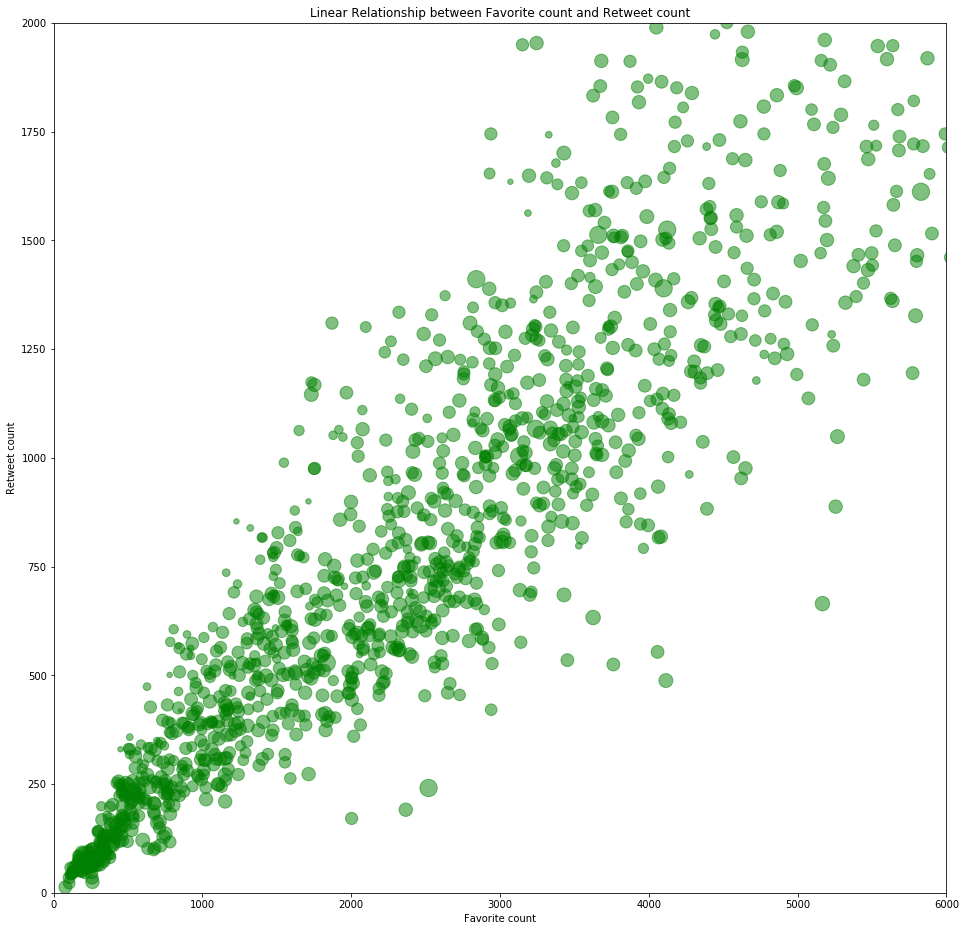

In [239]:
x = df_final['favorite_count']
y = df_final['retweet_count']
area = df_final['rating']*300

plt.figure(figsize=(16, 16))
plt.scatter(x,y,s=area, color = 'green', alpha = 0.5)
plt.xlim(0,6000)
plt.ylim(0,2000)
plt.title("Linear Relationship between Favorite count and Retweet count")
plt.xlabel("Favorite count")
plt.ylabel("Retweet count")
plt.show()